In [2]:
import pandas as pd

In [29]:
df = pd.read_csv("/content/drive/MyDrive/desafio_data_science/Customer-Churn - Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7569-NMZYQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),"118,75","8672,45",No
1,8984-HPEMB,Female,0,No,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,"118,65","8477,6",No
2,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,"118,6","7990,05",No
3,5734-EJKXG,Female,0,No,No,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,"118,6","7365,7",No
4,8199-ZLLSA,Male,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),"118,35","7804,15",Yes


# Exploratory Analysis

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
not_categorical = ["tenure","MonthlyCharges","TotalCharges","customerID", "Churn"]

In [31]:
dummies = df.columns.difference(not_categorical)
dummies = df[dummies]
dummies = pd.get_dummies(dummies)

In [32]:
result = pd.concat([df[not_categorical], dummies], axis=1)

In [33]:
result["MonthlyCharges"] = result["MonthlyCharges"].str.replace(",",".").astype(float)
result["TotalCharges"] = result["TotalCharges"].str.replace(",",".").astype(float)

In [34]:
result.isnull().sum()

tenure                                      0
MonthlyCharges                              0
TotalCharges                               11
customerID                                  0
Churn                                       0
SeniorCitizen                               0
Contract_Month-to-month                     0
Contract_One year                           0
Contract_Two year                           0
Dependents_No                               0
Dependents_Yes                              0
DeviceProtection_No                         0
DeviceProtection_No internet service        0
DeviceProtection_Yes                        0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
OnlineBackup_No                             0
OnlineBackup_No internet service  

In [35]:
result = result.dropna()

In [36]:
result.head()

,tenure,MonthlyCharges,TotalCharges,customerID,Churn,SeniorCitizen,Contract_Month-to-month,Contract_One year,Contract_Two year,Dependents_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male
0,72,118.75,8672.45,7569-NMZYQ,No,0,0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
1,71,118.65,8477.60,8984-HPEMB,No,0,0,0,1,1,...,0,1,0,0,1,0,0,1,1,0
2,68,118.60,7990.05,5989-AXPUC,No,0,0,0,1,1,...,0,1,0,0,1,0,0,1,1,0
3,61,118.60,7365.70,5734-EJKXG,No,0,0,1,0,1,...,0,1,0,0,1,0,0,1,1,0
4,67,118.35,7804.15,8199-ZLLSA,Yes,0,0,1,0,1,...,0,1,0,0,1,0,0,1,0,1


In [37]:
def convert(x):
  if x == "No":
    return 0
  elif x == "Yes":
    return 1
result["Churn"] = result["Churn"].apply(convert)

In [11]:
categorical = df.columns.difference(not_categorical)
categorical = df[categorical]

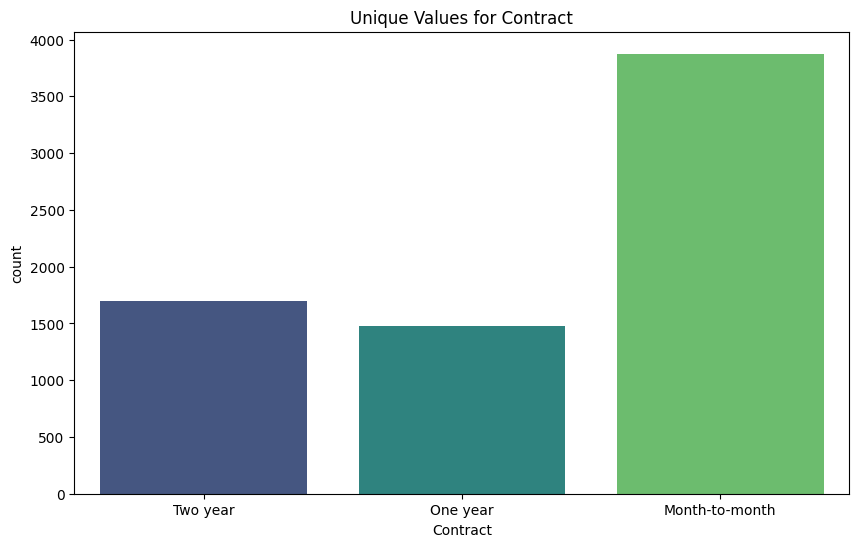

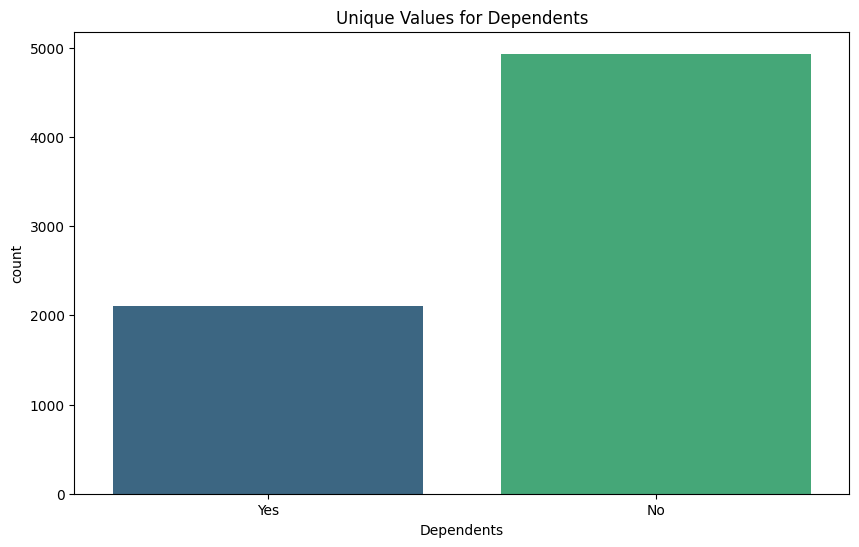

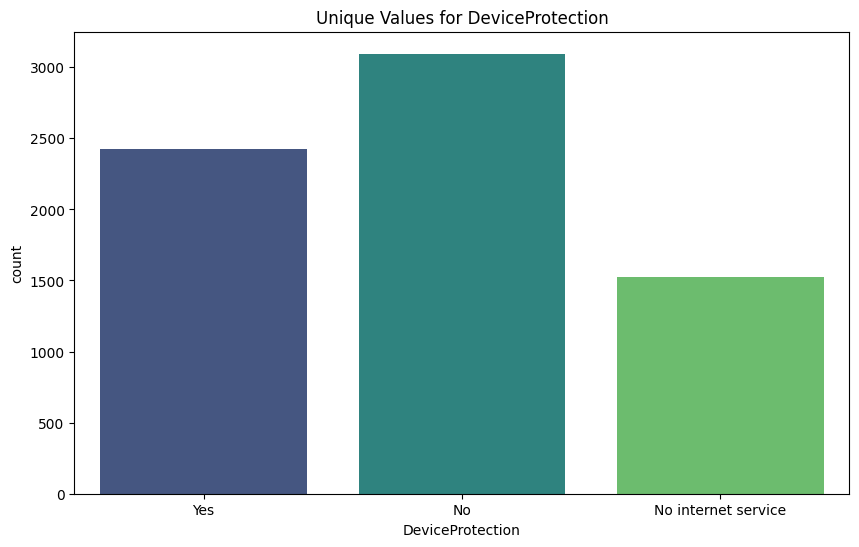

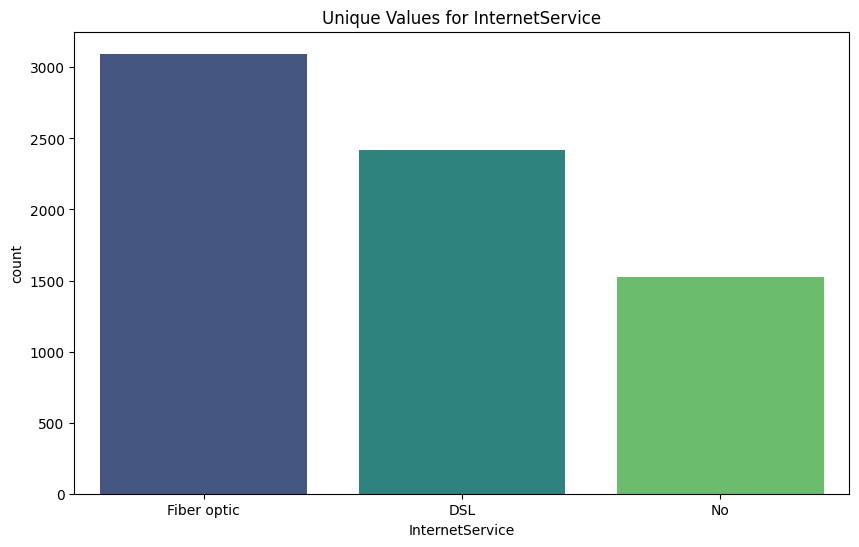

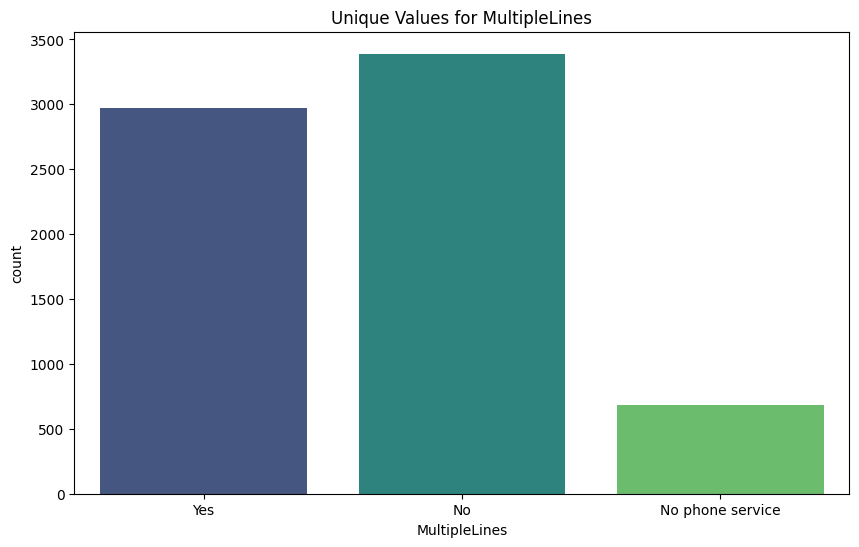

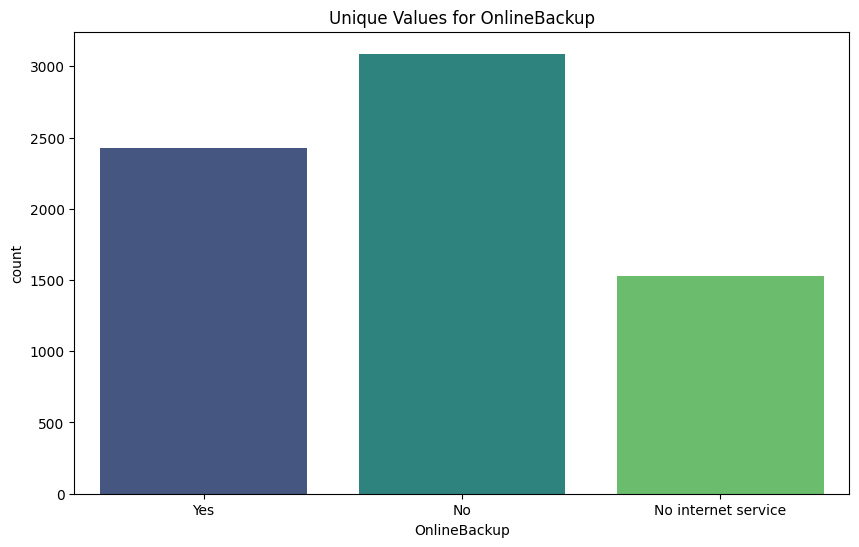

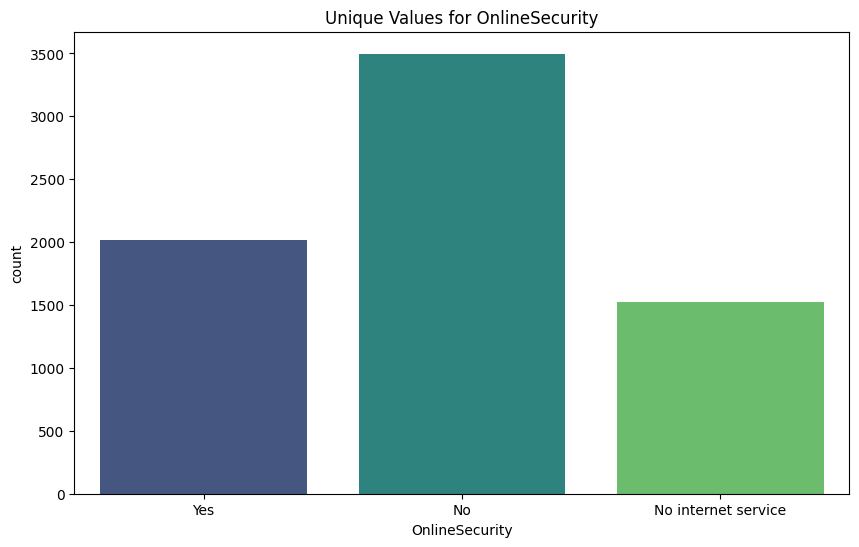

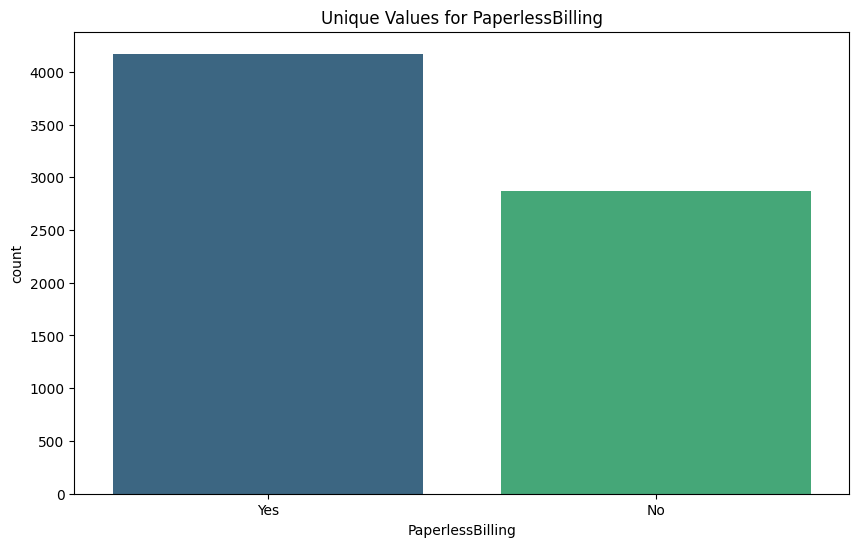

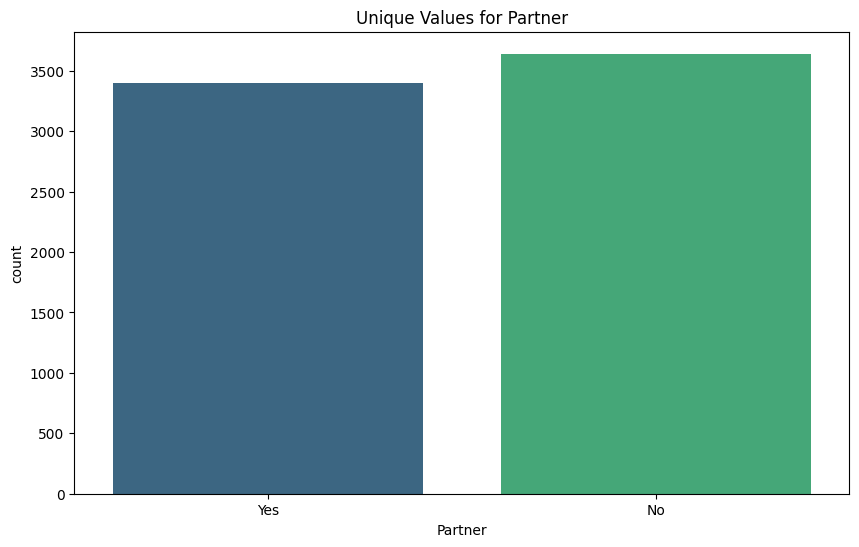

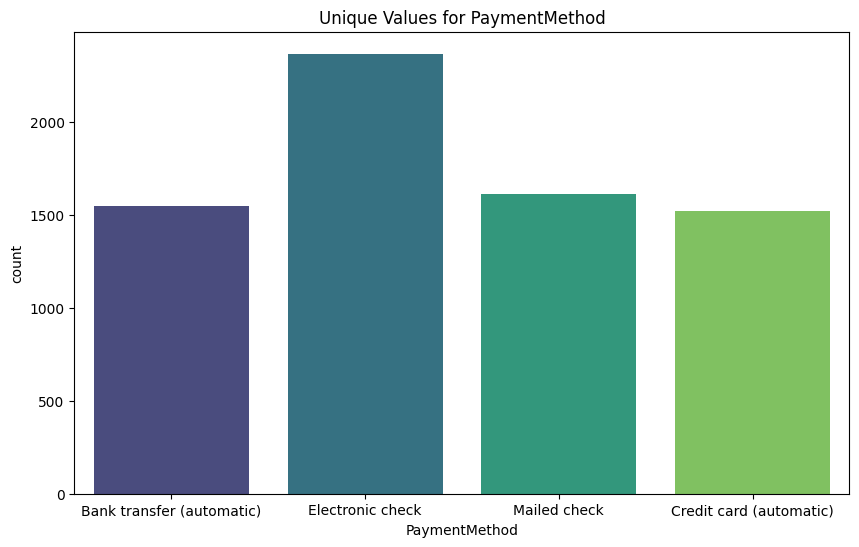

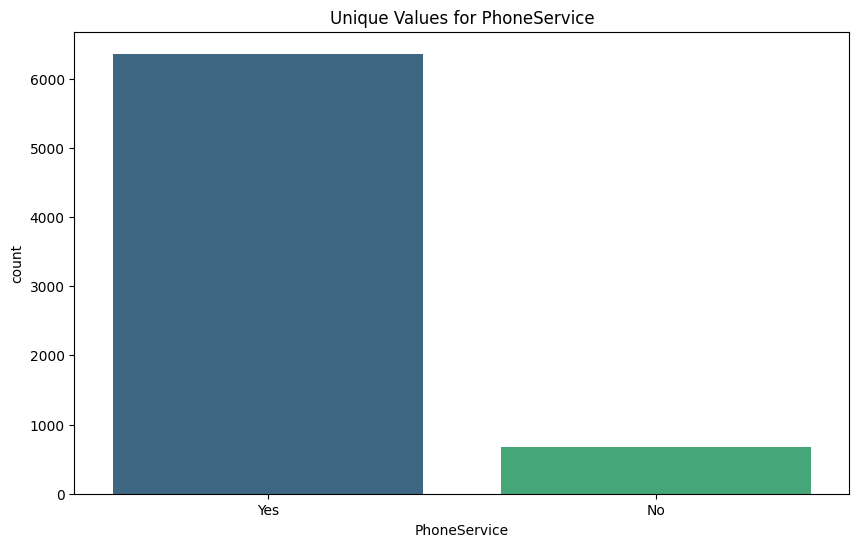

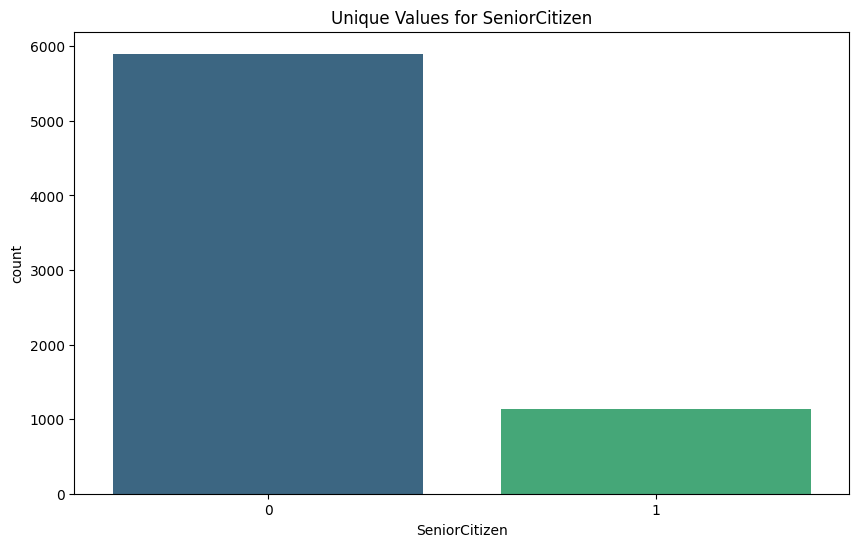

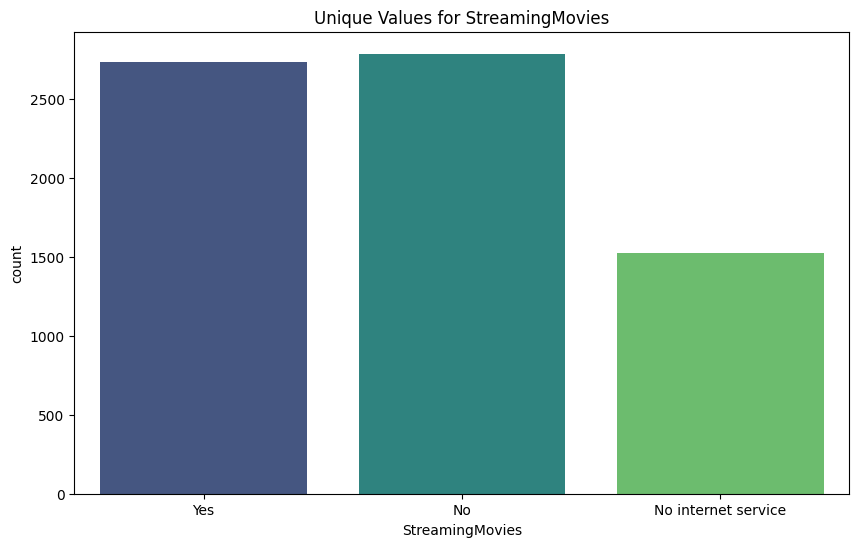

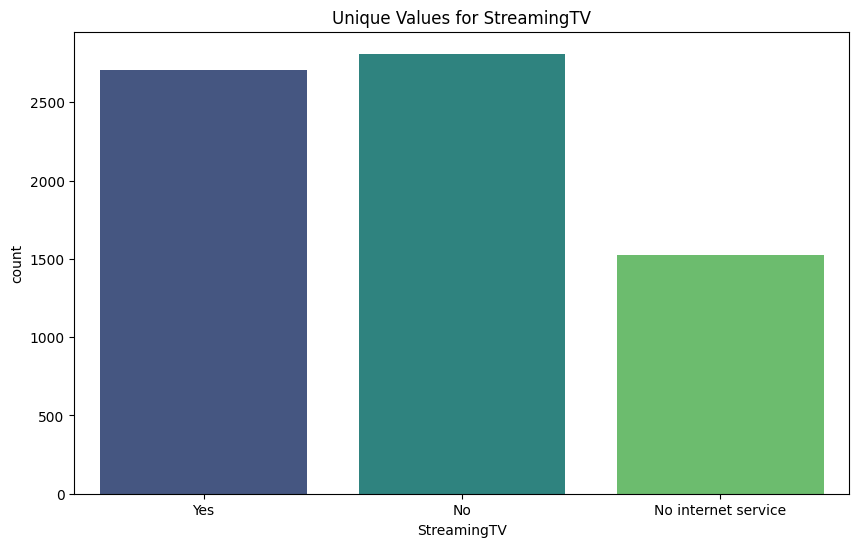

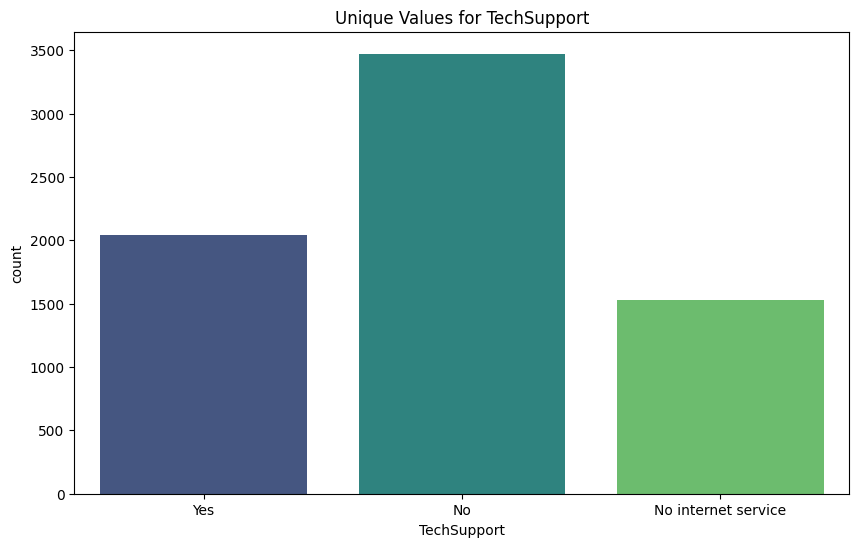

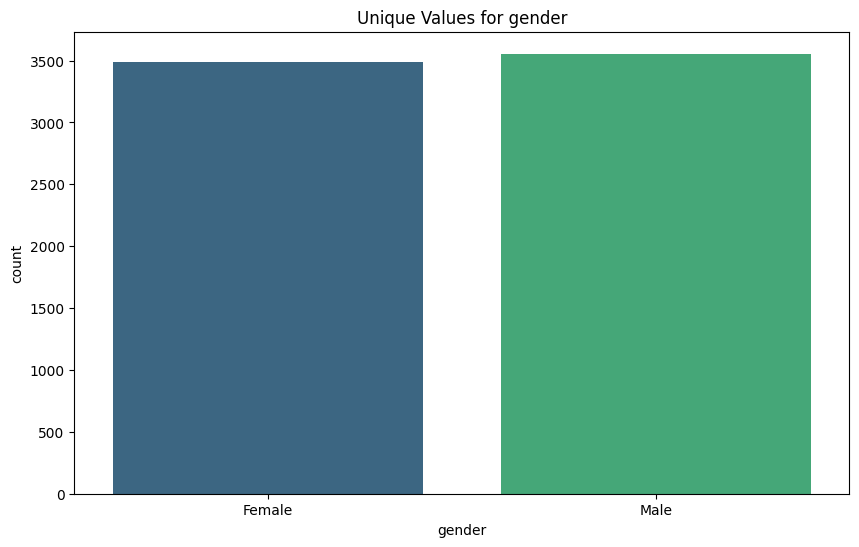

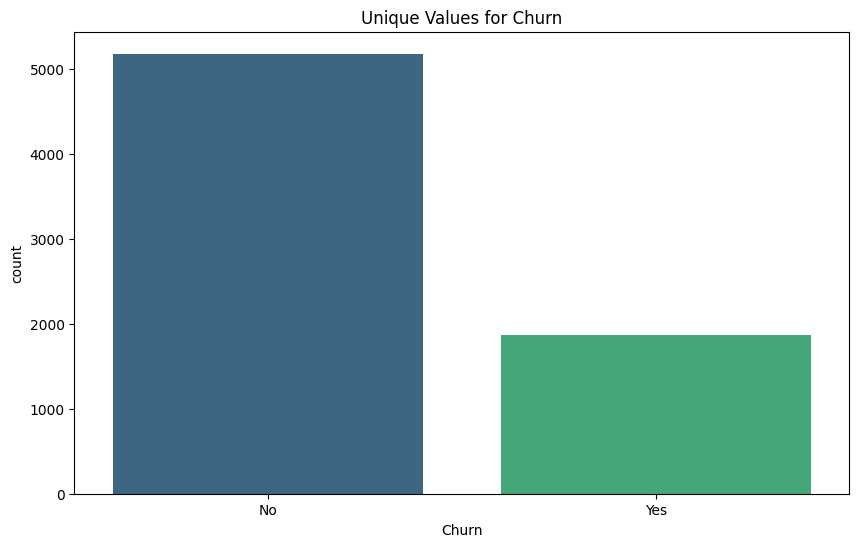

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
cat = categorical.columns.to_list()
cat.append("Churn")
for column in cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df, palette='viridis')
    plt.title(f'Unique Values for {column}')
    plt.show()

<ipython-input-11-88f4b950ccc3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = result.corr()


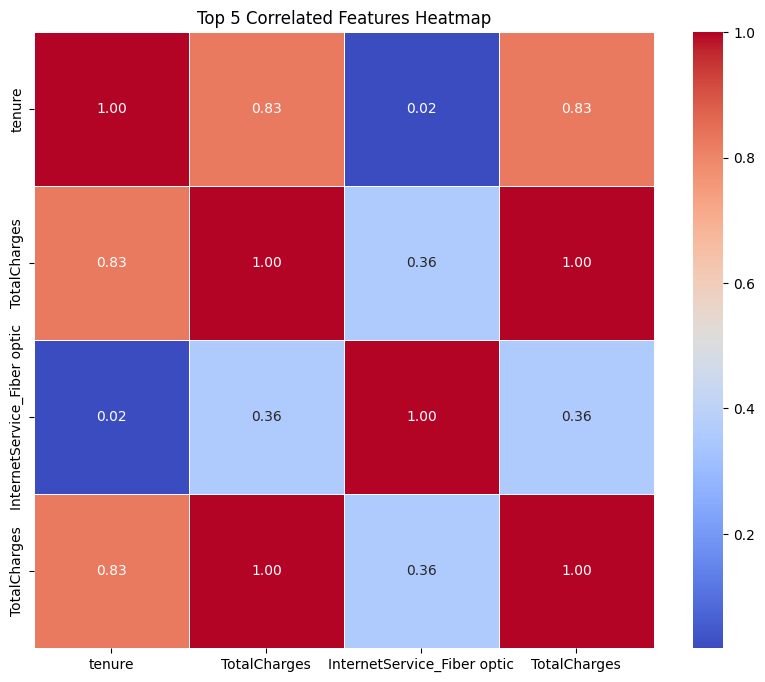

In [11]:
correlation_matrix = result.corr()

top_corr_features = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().head(4)

top_features = [pair[0] for pair in top_corr_features.index]

top_corr_matrix = result[top_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Top 5 Correlated Features Heatmap')
plt.show()


In [12]:
X = result.drop(['customerID',"Churn"], axis=1).copy()
y = result['Churn'].copy()

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Implemmentation

In [16]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [34]:
classifier = svm.SVC()
classifier.fit(X_train, y_train)

SVC()

In [35]:
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7299218194740583
Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84      1027
           1       0.00      0.00      0.00       380

    accuracy                           0.73      1407
   macro avg       0.36      0.50      0.42      1407
weighted avg       0.53      0.73      0.62      1407



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, classification_report

rf_classifier = RandomForestClassifier(n_estimators=150, random_state=40)

rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)

Accuracy: 0.759772565742715
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84      1027
           1       0.57      0.46      0.51       380

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.67      1407
weighted avg       0.75      0.76      0.75      1407



In [37]:
import numpy as np

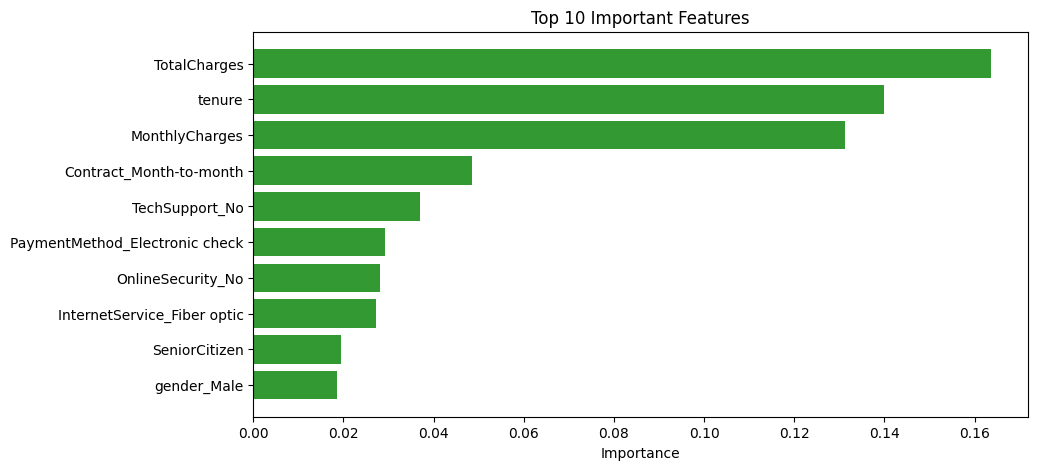

In [38]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[-10:]
features = X.columns

plt.figure(figsize=(10, 5))
plt.title('Top 10 Important Features')
plt.barh(range(len(indices)), importances[indices], color='g', align='center', linestyle="solid", alpha=0.8)
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.show()

# XgBoost

In [23]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, colsample_bytree=0.3, learning_rate=0.1,
                            max_depth=3, alpha=10, n_estimators=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

feature_importances = model.feature_importances_

features_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

features_df.head(10)

,Feature,Importance
4,Contract_Month-to-month,0.214750
40,TechSupport_No,0.137974
21,OnlineSecurity_No,0.118032
13,InternetService_Fiber optic,0.080953
30,PaymentMethod_Electronic check,0.076671
0,tenure,0.065164
14,InternetService_No,0.036730
2,TotalCharges,0.035172
41,TechSupport_No internet service,0.031292
5,Contract_One year,0.029288


In [40]:
accuracy_rf = accuracy_score(y_test, y_pred)
report_rf = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", report_rf)

Accuracy: 0.7683013503909026
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      1027
           1       0.62      0.37      0.46       380

    accuracy                           0.77      1407
   macro avg       0.71      0.64      0.66      1407
weighted avg       0.75      0.77      0.75      1407



In [24]:
!pip install shap

[15:14:24] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


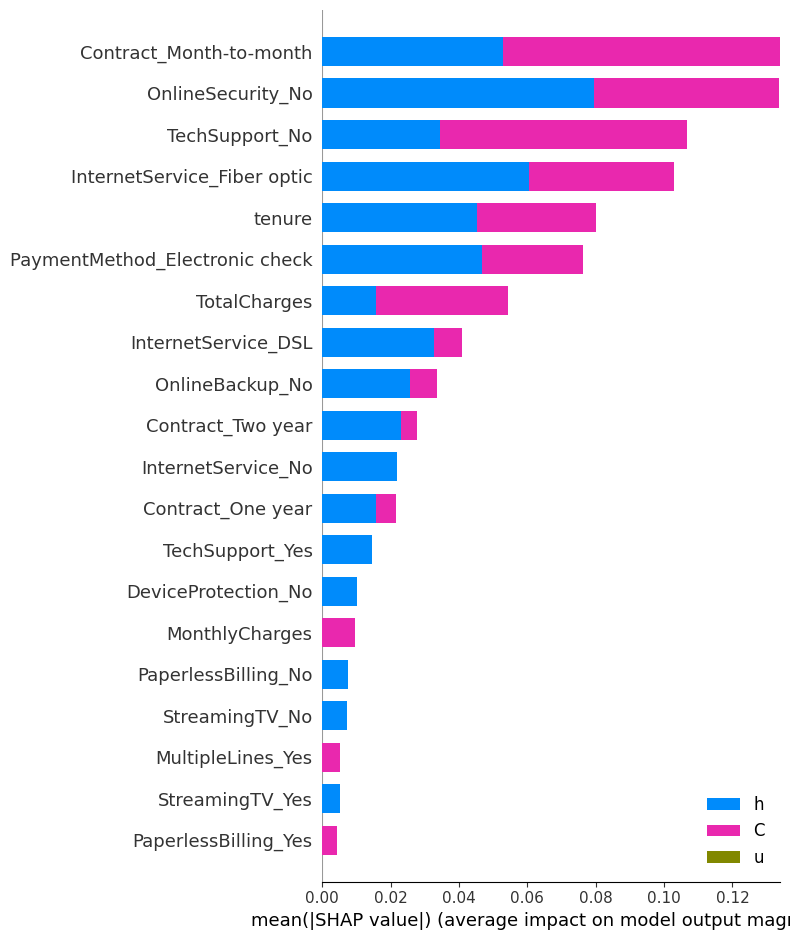

In [26]:
import shap

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns, class_names="Churn")

In [28]:
result["Churn"].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

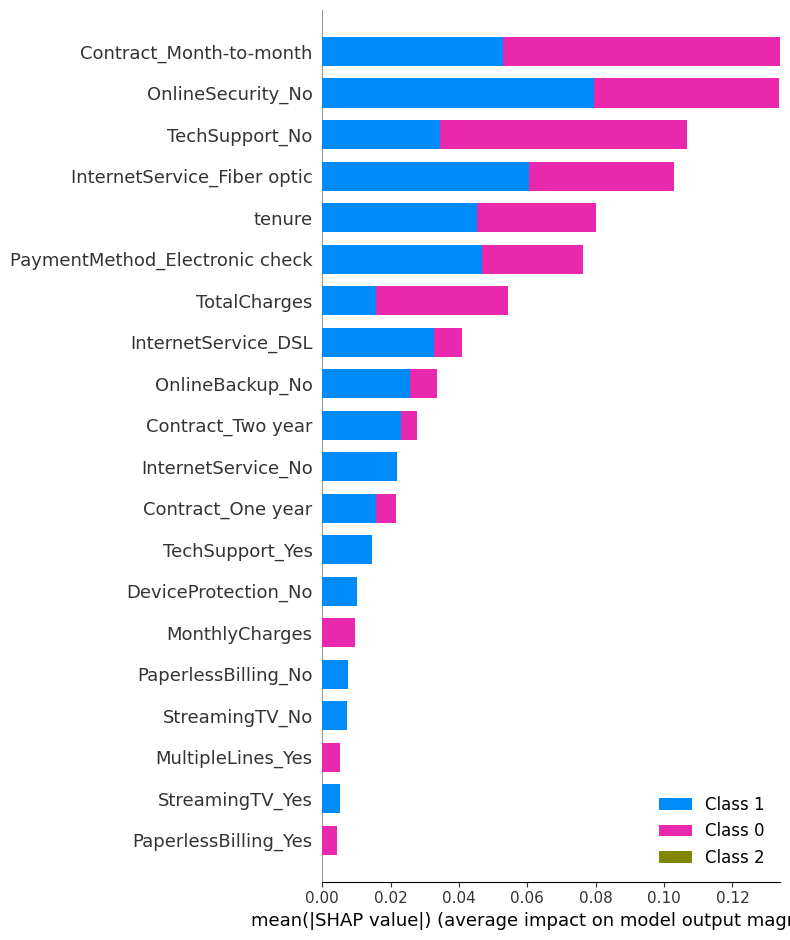

In [27]:
shap.summary_plot(shap_values, X_test)

## Pycaret

In [ ]:
!pip install pycaret

In [46]:
!pip install --upgrade pycaret
!pip install --upgrade scipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 26.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
pycaret 3.2.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.


In [44]:
model_data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(model_data.index)

model_data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(model_data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6339, 21)
Unseen Data For Predictions: (704, 21)


In [47]:
from pycaret.classification import *

clf = setup(model_data, target='Churn')

best_model = compare_models()

final_model = create_model(best_model)

evaluate_model(final_model)

,Description,Value
0,Session id,4384
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(6339, 21)"
5,Transformed data shape,"(6339, 42)"
6,Transformed train set shape,"(4437, 42)"
7,Transformed test set shape,"(1902, 42)"
8,Ordinal features,5
9,Numeric features,2


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.7685,0.7558,0.7685,0.7513,0.7527,0.3399,0.3513,1.4320
lr,Logistic Regression,0.7494,0.8238,0.7494,0.7486,0.6674,0.1062,0.1935,2.9100
svm,SVM - Linear Kernel,0.7469,0.0000,0.7469,0.7609,0.7313,0.3192,0.3487,0.8930
ridge,Ridge Classifier,0.7392,0.0000,0.7392,0.7009,0.6554,0.0733,0.1302,0.6730
et,Extra Trees Classifier,0.7343,0.7486,0.7343,0.5746,0.6232,0.0036,0.0121,1.1550
nb,Naive Bayes,0.7341,0.5000,0.7341,0.5388,0.6215,0.0000,0.0000,0.8750
dt,Decision Tree Classifier,0.7341,0.5000,0.7341,0.5388,0.6215,0.0000,0.0000,1.3300
rf,Random Forest Classifier,0.7341,0.7214,0.7341,0.5388,0.6215,0.0000,0.0000,0.8130
qda,Quadratic Discriminant Analysis,0.7341,0.5000,0.7341,0.5388,0.6215,0.0000,0.0000,0.4000
ada,Ada Boost Classifier,0.7341,0.5000,0.7341,0.5388,0.6215,0.0000,0.0000,0.6520


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7973,0.7728,0.7973,0.7845,0.7834,0.4211,0.4343
1,0.7928,0.7908,0.7928,0.7793,0.7723,0.3861,0.4095
2,0.7500,0.7617,0.7500,0.7360,0.7408,0.3169,0.3202
3,0.7770,0.7619,0.7770,0.7618,0.7643,0.3727,0.3811
4,0.7635,0.7384,0.7635,0.7406,0.7382,0.2927,0.3133
5,0.7703,0.7686,0.7703,0.7519,0.7535,0.3400,0.3520
6,0.7297,0.7324,0.7297,0.7044,0.7112,0.2282,0.2353
7,0.7607,0.7307,0.7607,0.7445,0.7486,0.3338,0.3399
8,0.7765,0.7447,0.7765,0.7613,0.7638,0.3723,0.3807


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [48]:
predict_model(final_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7792,0.7667,0.7792,0.7625,0.7625,0.3640,0.3777


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7d304599fb50>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
2052,0221-NAUXK,Male,0,No,Yes,10,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Bank transfer (automatic),"19,95","219,5",No,No,1.0
118,1325-USMEC,Male,0,Yes,No,70,Yes,Yes,Fiber optic,Yes,...,Yes,No,Two year,Yes,Credit card (automatic),"99,35","6944,5",No,No,1.0
382,9906-NHHVC,Female,1,No,No,65,No,No phone service,DSL,No,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),"53,5","3517,9",No,No,0.8
4901,2832-KJCRD,Female,0,No,No,38,Yes,Yes,Fiber optic,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,"103,65","3988,5",No,Yes,0.6
5878,3137-NYQQI,Male,0,Yes,No,17,Yes,No,DSL,Yes,...,No,Yes,One year,No,Mailed check,"64,8","1175,6",No,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4519,3489-HHPFY,Female,0,Yes,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,Month-to-month,Yes,Electronic check,"84,05","134,05",No,Yes,0.8
1294,1934-MKPXS,Male,0,Yes,Yes,33,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Credit card (automatic),"20,1","620,55",No,No,1.0
85,3327-YBAKM,Female,0,Yes,No,64,Yes,No,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Mailed check,"96,9","6314,35",No,No,0.8
3841,4335-UPJSI,Female,0,No,Yes,24,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,"19,75","498,1",No,No,1.0


In [49]:
final_xg = finalize_model(final_model)

unseen_predictions = predict_model(final_xg, data=data_unseen)
unseen_predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.7940,0.8083,0.7940,0.7791,0.7758,0.3876,0.4063


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Electronic check,"118,2","8547,15",No,No,1.0
1,3810-DVDQQ,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Bank transfer (automatic),"117,6","8308,9",No,No,1.0
2,4282-MSACW,Male,0,No,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),"117,2","8035,95",No,No,0.6
3,9788-HNGUT,Male,0,Yes,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Two year,Yes,Credit card (automatic),"116,95","8594,4",No,No,1.0
4,3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,One year,Yes,Credit card (automatic),"116,6","7049,5",No,No,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0661-KQHNK,Female,0,Yes,Yes,6,Yes,No,No,No internet service,...,No internet service,No internet service,One year,No,Credit card (automatic),19,"105,5",No,No,1.0
700,7234-KMNRQ,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,No,Mailed check,19,"73,45",No,No,1.0
701,1423-BMPBQ,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,Month-to-month,Yes,Mailed check,19,19,No,Yes,0.6
702,0621-CXBKL,Female,0,No,No,53,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,"18,7","1005,7",No,No,1.0


## KNeighborsClassifier

In [1]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=10)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7732764747690121

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85      1027
           1       0.63      0.39      0.48       380

    accuracy                           0.77      1407
   macro avg       0.72      0.65      0.67      1407
weighted avg       0.76      0.77      0.75      1407



# Label Encoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/desafio_data_science/Customer-Churn - Customer-Churn.csv")
df.head()

In [ ]:
not_categorical = ["tenure","MonthlyCharges","TotalCharges","customerID", "Churn"]